In [7]:
import os
import MontagePy.main as m
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import imshow_norm, ZScaleInterval
from astropy.table import Table
import glob
%matplotlib inline

In [2]:
os.chdir('../Data/SPTPol/images/mosaic_tiles/')
os.getcwd()

'/lustre/work/mei/bfloyd/SPT_AGN/Data/SPTPol/images/mosaic_tiles'

In [3]:
m.mImgtbl('raw/sci_img', 'rImages.tbl')

{'status': '0', 'count': 2, 'badfits': 0, 'badwcs': 0}

In [4]:
m.mMakeHdr('rImages.tbl', 'rBounding.hdr')

{'status': '0',
 'count': 2,
 'ncube': 0,
 'naxis1': 14705,
 'naxis2': 13955,
 'clon': 358.7904474840388,
 'clat': -50.86220132116989,
 'lonsize': 2.450838235,
 'latsize': 2.325837985,
 'posang': 0.22720678363638785,
 'lon1': 0.7880122828242975,
 'lat1': -52.00319877001041,
 'lon2': 356.8074255480142,
 'lat2': -52.013160146173334,
 'lon3': 356.8896325290504,
 'lat3': -49.688751936431906,
 'lon4': 0.6766364871069754,
 'lat4': -49.679274825650424}

In [ ]:
m.mProjExec('raw/sci_img', 'rImages.tbl', 'rBounding.hdr', projdir='projected', quickMode=True)

In [22]:
m.mImgtbl('projected', 'pImages.tbl')

{'status': '0', 'count': 2, 'badfits': 0, 'badwcs': 0}

In [23]:
m.mAdd('projected', 'pImages.tbl', 'rBounding.hdr', 'test.fits', coadd=0)

{'status': '0', 'time': 25.0}

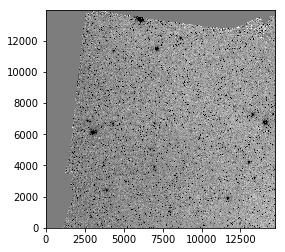

In [3]:
mosaic = fits.getdata('test.fits')
imshow_norm(mosaic, origin='lower', cmap='gray_r', interval=ZScaleInterval())
plt.show()

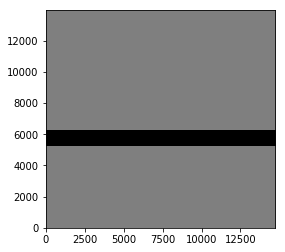

In [4]:
mosaic_area = fits.getdata('test_area.fits')
imshow_norm(mosaic_area, origin='lower', cmap='gray_r', interval=ZScaleInterval())
plt.show()

In [10]:
file_list = ['../ssdf_tiles/I1_SSDF0.0_mosaic.fits', '../ssdf_tiles/I1_SSDF0.1_mosaic.fits']
t = Table([file_list], names=['fname'])
t.write('test_tiles.imglist', format='ascii.ipac')

In [12]:
m.mImgtbl('.', 'test_img.tbl', imgListFile='test_tiles.imglist')

{'status': '0', 'count': 2, 'badfits': 0, 'badwcs': 0}

In [13]:
Table.read('test_img.tbl', format='ascii.ipac')

cntr,ra,dec,cra,cdec,naxis1,naxis2,ctype1,ctype2,crpix1,crpix2,crval1,crval2,cdelt1,cdelt2,crota2,equinox,naxis,naxis3,crval3,cdelt3,crpix3,naxis4,crval4,cdelt4,crpix4,ra1,dec1,ra2,dec2,ra3,dec3,ra4,dec4,size,hdu,fname
int64,float64,float64,str14,str14,int64,int64,str8,str8,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str36
0,346.4739277,-50.5084151,23h 05m 53.74s,-50d 30m 30.3s,14100,7700,RA---TAN,DEC--TAN,6950.51416,3900.50781,346.5,-50.5,-0.000166667,0.000166667,0.0,2000.0,2,--,--,--,--,--,--,--,--,348.3461069,-51.1356087,348.2966356,-49.852808,344.651971,-49.8520021,344.6010867,-51.1347652,434286720,0,../ssdf_tiles/I1_SSDF0.0_mosaic.fits
1,346.3930446,-51.5000358,23h 05m 34.33s,-51d 30m 00.1s,14100,6500,RA---TAN,DEC--TAN,6650.51318,3250.50659,346.5,-51.5,-0.000166667,0.000166667,0.0,2000.0,2,--,--,--,--,--,--,--,--,348.3015193,-52.0280809,348.25922,-50.9451339,344.529606,-50.9417699,344.482237,-52.0245838,366606720,0,../ssdf_tiles/I1_SSDF0.1_mosaic.fits
